<h1 style="text-align:center;font-size: 3em"> TP6 : Analyse et prédiction des infections COVID-19 </h1>

### Importer les bibliothèques nécessaires


In [1]:
import numpy as np
import pandas as pd

### Importer le fichier de données après son nettoyage

In [2]:
df = pd.read_csv("covid_data_cleaned.csv")
print('Les noms des colonnes: \n',df.columns.values)

Les noms des colonnes: 
 ['age' 'sex' 'chronic_disease_binary' 'asymptomatic' 'cough' 'fatigue'
 'fever' 'headache' 'malaise' 'pneumonia' 'respiratory problems'
 'runny nose' 'sore throat' 'diabetes' 'hypertension' 'outcome']


In [3]:
df.shape

(1577, 16)

In [4]:
df

,age,sex,chronic_disease_binary,asymptomatic,cough,fatigue,fever,headache,malaise,pneumonia,respiratory problems,runny nose,sore throat,diabetes,hypertension,outcome
0,60,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,45,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,25,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
3,45,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,85,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1573,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1574,35,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1575,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


##  1. Calculez les corrélations entre les variables. Quelles sont les variables les plus corrélées avec la cible (‘result’)? Expliquez les résultats.

In [5]:
df.corr()

,age,sex,chronic_disease_binary,asymptomatic,cough,fatigue,fever,headache,malaise,pneumonia,respiratory problems,runny nose,sore throat,diabetes,hypertension,outcome
age,1.000000,0.074035,0.269721,-0.092924,0.024976,0.075835,-0.036621,-0.075039,0.042810,0.182647,0.151409,-0.088150,-0.071339,0.191144,0.246387,-0.296449
sex,0.074035,1.000000,0.070941,-0.015488,-0.024624,-0.028209,0.017434,-0.020835,0.049048,0.063021,0.022867,-0.047703,-0.054563,0.060789,0.046194,-0.082325
chronic_disease_binary,0.269721,0.070941,1.000000,-0.053872,-0.052710,-0.030147,-0.172809,-0.050477,-0.052212,0.518432,0.482077,-0.047538,-0.016424,0.656456,0.757860,-0.728110
asymptomatic,-0.092924,-0.015488,-0.053872,1.000000,-0.130809,-0.039694,-0.194426,-0.038509,-0.032391,-0.048326,-0.043363,-0.029492,-0.050060,-0.036671,-0.041982,0.056613
cough,0.024976,-0.024624,-0.052710,-0.130809,1.000000,-0.019657,0.168018,0.015364,-0.001978,-0.156608,-0.127954,0.055013,0.046038,-0.067095,-0.102893,0.093553
fatigue,0.075835,-0.028209,-0.030147,-0.039694,-0.019657,1.000000,0.020323,-0.000250,-0.038471,-0.057397,-0.051502,-0.035028,0.036587,-0.011836,-0.021824,-0.008516
fever,-0.036621,0.017434,-0.172809,-0.194426,0.168018,0.020323,1.000000,-0.003531,-0.099677,-0.188569,-0.201340,0.030465,-0.026851,-0.127674,-0.162685,0.171968
headache,-0.075039,-0.020835,-0.050477,-0.038509,0.015364,-0.000250,-0.003531,1.000000,0.182293,-0.030234,-0.049964,0.065998,0.127453,-0.025950,-0.033961,0.054106
malaise,0.042810,0.049048,-0.052212,-0.032391,-0.001978,-0.038471,-0.099677,0.182293,1.000000,0.012922,-0.042027,-0.028583,0.009446,-0.035541,-0.040689,0.054869
pneumonia,0.182647,0.063021,0.518432,-0.048326,-0.156608,-0.057397,-0.188569,-0.030234,0.012922,1.000000,0.451587,-0.042644,-0.052235,0.412794,0.539314,-0.517568


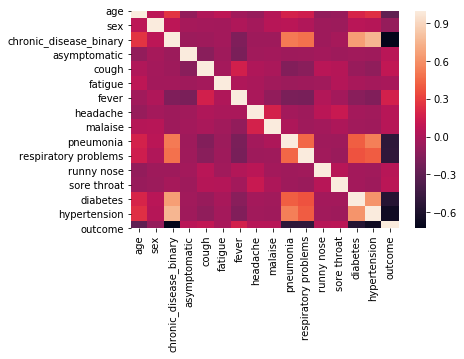

In [6]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### On peut remarquer que les variables 'chronic_disease_binary' et 'hypertension' sont les plus corrélées avec la cible ('result') ou ('outcome'), cela signifie que nous avons un lien et une dépendance entre ces variables et la variable cible de notre jeu de données

## 2. Visualisez les données en deux dimensions en passant par l’ACP (analyse en composantes principales). Pouvez-vous utiliser une autre méthode ? 

#### Nous allons commencer par ACP


In [7]:
X = df[['age','sex','chronic_disease_binary','asymptomatic','cough','fatigue','fever','headache','malaise','pneumonia','respiratory problems','runny nose','sore throat','diabetes','hypertension']]
Y = df['outcome']

#cols = df.columns.tolist()
#X = df[cols[0:15]]
#Y = df[cols[15:16]]

In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
princ_pca = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
princ_lda = lda.fit(X, Y).transform(X)

#### Pour la méthode LDA, elle utilise au maximum (n_classes - 1) colonnes. Il s'agit du nombre maximum de colonnes que nous voulons obtenir. Dans notre cas, nous avons 2 classes ('Dead: 0', 'Discharged: 1'), donc nous obtiendrons un maximum de 1 colonne.

In [9]:
principal_Df_PCA = pd.DataFrame(data = princ_pca
                     , columns = ['principal component 1', 'principal component 2'])

principal_Df_LDA = pd.DataFrame(data = princ_lda
                     , columns = ['principal component 1'])

In [10]:
principal_Df_PCA.head()

,principal component 1,principal component 2
0,-9.741707,-0.040233
1,5.260392,-0.179588
2,25.260267,-0.684727
3,5.259751,-0.725725
4,-34.738667,-0.279784


In [11]:
principal_Df_LDA.head()

,principal component 1
0,-0.486583
1,0.479503
2,0.957996
3,0.537840
4,0.098562


<Figure size 432x288 with 0 Axes>

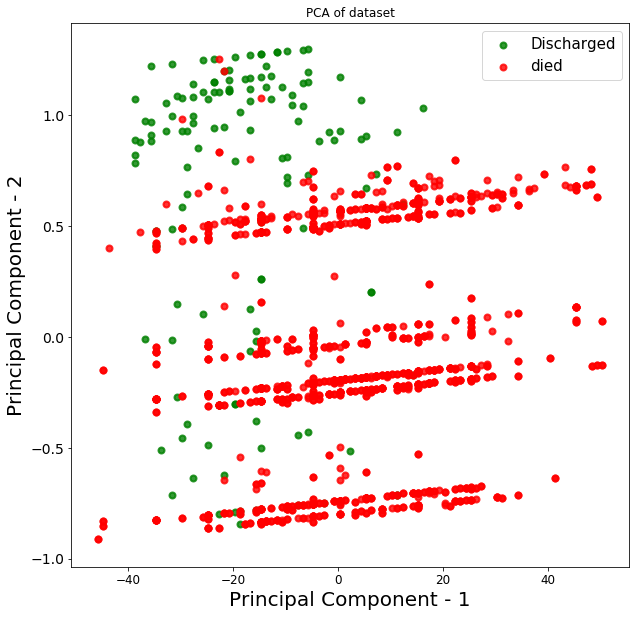

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Dataset",fontsize=20)

colors = ['g', 'r', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], [0, 1]):
    plt.scatter(princ_pca[Y == i, 0], princ_pca[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=[0, 1])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.legend(['Discharged','died'],prop={'size': 15})
plt.show()

### Dans la suite, nous utilisons une méthode d'apprentissage automatique afin de prédire la classe : les patients sont soit «décédés» (‘died’) soit «sortis» (‘discharged’) de l'hôpital. Vous pouvez utiliser la classification par K-Nearest Neighbours (K-NN), l’arbre de decision ou le classificateur Bayes 

##  3. Les résultats obtenus doivent être validés en utilisant certains indices externes comme l’erreur de prédiction (matrice de confusion et précision) ou d'autres comme Rappel, F-Measure, …

In [13]:
X = df[['age','sex','chronic_disease_binary','asymptomatic','cough','fatigue','fever','headache','malaise','pneumonia','respiratory problems','runny nose','sore throat','diabetes','hypertension']]
Y = df['outcome']

# K-Nearest Neighbours (K-NN)

### Créer une fonction qui cherche le meilleur k

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
import random
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

def bestK_KNN(X_train, y_train, X_test, y_test):
    Ks = 50
    mean_acc = np.zeros((Ks-1))
    for n in tqdm(range(1,Ks)):
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        mean_acc[n-1] = neigh.score(X_test, y_test)

    plt.plot(range(1,Ks),mean_acc,'g')
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of neighbors (K)')
    plt.tight_layout()
    plt.show()
    print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1)
    
    return mean_acc.argmax()+1

### diviser l'ensemble de données en données de test et d'apprentissage

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random.seed())

### Trouver le meilleur k

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 40.66it/s]


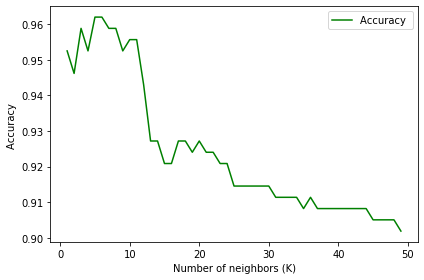

The best accuracy was  0.9620253164556962 with k= 5


In [28]:
best_K = bestK_KNN(X_train, y_train, X_test, y_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors = best_K).fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Compute the mean squared error of our predictions.
mse = (((y_pred - y_test) ** 2).sum()) / len(y_pred)
print("Le pourcentage d'erreur pour le modèle KNN est :", mse*100 ,'%')

Le pourcentage d'erreur pour le modèle KNN est : 3.79746835443038 %


In [30]:
res_knn = knn.score(X_test,y_test)
print("Accuracy pour le modèle KNN est :", res_knn*100 ,'%')

Accuracy pour le modèle KNN est : 96.20253164556962 %


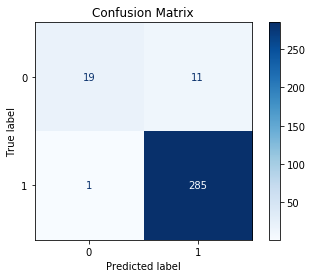

In [31]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)
                                 
disp.ax_.set_title("Confusion Matrix")
plt.show()
#%matplotlib.inline

In [32]:
from sklearn.metrics import accuracy_score
print("Accuray score: \t\t",accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print("F-Measure: \t\t",f1_score(y_test, y_pred,average='macro'))
from sklearn.metrics import precision_score
print("Precision score: \t",precision_score(y_test, y_pred, average='macro'))
from sklearn.metrics import recall_score
print("Recall score: \t\t",recall_score(y_test, y_pred, average='macro'))

Accuray score: 		 0.9620253164556962
F-Measure: 		 0.8696907216494845
Precision score: 	 0.956418918918919
Recall score: 		 0.8149184149184149


In [33]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.96      1.00      0.98       286

    accuracy                           0.96       316
   macro avg       0.96      0.81      0.87       316
weighted avg       0.96      0.96      0.96       316



# Arbre de decision


In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred2 = clf.predict(X_test)

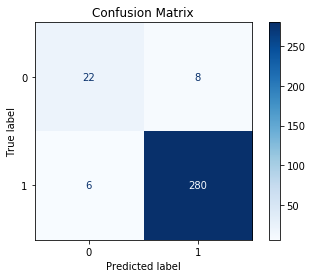

In [35]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
                                 
disp.ax_.set_title("Confusion Matrix")
plt.show()
#%matplotlib.inline

In [36]:
from sklearn.metrics import accuracy_score
print("Accuray score: \t\t",accuracy_score(y_test, y_pred2))
from sklearn.metrics import f1_score
print("F-Measure: \t\t",f1_score(y_test, y_pred2,average='macro'))
from sklearn.metrics import precision_score
print("Precision score: \t",precision_score(y_test, y_pred2, average='macro'))
from sklearn.metrics import recall_score
print("Recall score: \t\t",recall_score(y_test, y_pred2, average='macro'))

Accuray score: 		 0.9556962025316456
F-Measure: 		 0.8671152228763667
Precision score: 	 0.878968253968254
Recall score: 		 0.8561771561771562


In [37]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.97      0.98      0.98       286

    accuracy                           0.96       316
   macro avg       0.88      0.86      0.87       316
weighted avg       0.95      0.96      0.96       316



# Classificateur Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
clf_CB = MultinomialNB()
clf_CB.fit(X_train, y_train)
pred = clf_CB.predict(X_test)

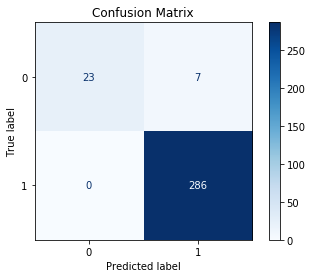

In [39]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf_CB, X_test, y_test,cmap=plt.cm.Blues)
                                 
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
print("Accuray score: \t\t",accuracy_score(y_test, pred))
from sklearn.metrics import f1_score
print("F-Measure: \t\t",f1_score(y_test, pred,average='macro'))
from sklearn.metrics import precision_score
print("Precision score: \t",precision_score(y_test, pred, average='macro'))
from sklearn.metrics import recall_score
print("Recall score: \t\t",recall_score(y_test, pred, average='macro'))

Accuray score: 		 0.9778481012658228
F-Measure: 		 0.9279173591423079
Precision score: 	 0.9880546075085324
Recall score: 		 0.8833333333333333


In [41]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        30
           1       0.98      1.00      0.99       286

    accuracy                           0.98       316
   macro avg       0.99      0.88      0.93       316
weighted avg       0.98      0.98      0.98       316



### 4. Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la prédiction à l'aide de l'erreur MSE (Mean Squared Error)

#### Tester sur tous les variables

In [42]:
X2 = df[['sex','chronic_disease_binary','asymptomatic','cough','fatigue','fever','headache','malaise','pneumonia','respiratory problems','runny nose','sore throat','diabetes','hypertension','outcome']]
Y2 = df['age']

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=random.seed())

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train2 , y_train2)

LinearRegression()

In [45]:
y2_pred = reg.predict(X_test2)

In [46]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test2, y2_pred)
print('l\'erreur MSE : ',MSE)

l'erreur MSE :  321.6017646906366


#### Utiliser RFE pour sélectionner les variables explicatives :

In [47]:
from sklearn.feature_selection import RFE
selecteur = RFE(estimator = reg)

sel = selecteur.fit(X_test2, y_test2)

print(sel.n_features_)
print(sel.support_)

7
[False False False False  True  True False False False  True  True  True
 False  True  True]


In [48]:
# get the feature support boolean list
rfe_mask = sel.support_
# reduce the dataframe to just those features
X_scaled_rfe_reduced = X.iloc[:,rfe_mask]

In [49]:
X_scaled_rfe_reduced

,cough,fatigue,pneumonia,respiratory problems,runny nose,diabetes,hypertension
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1572,1,0,0,0,0,0,0
1573,0,0,0,0,0,0,0
1574,1,0,0,0,0,0,0
1575,1,0,0,0,0,0,0


In [50]:
X2_RFE = X_scaled_rfe_reduced
Y2_RFE = df['age']

In [51]:
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X2_RFE, Y2_RFE, test_size=0.2, random_state=random.seed())

In [52]:
reg_RFE = LinearRegression()
reg_RFE.fit(X_train_RFE , y_train_RFE)
y_pred_RFE = reg_RFE.predict(X_test_RFE)

In [53]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_RFE, y_pred_RFE)
print('l\'erreur MSE : ',MSE)

l'erreur MSE :  292.0825627294294


***

### 5. Appliquer trois méthodes de clustering (K-means, NMF et CAH) sur l'ensemble de données pour segmenter les personnes en différents groupes. Utilisez l'index de Silhouette pour connaître le meilleur nombre de clusters.

# K-means

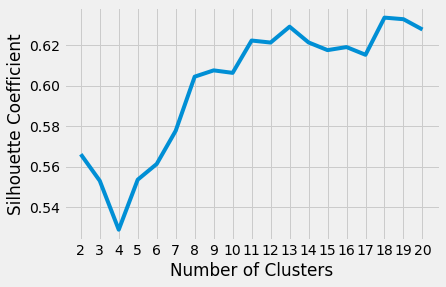

D'après l'index de Silhouette, le meilleur nombre de clusters est: 18  avec un score de :  0.6335462472640803


In [57]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

best_clusters = 0
silh_score = 0.0
silhouette_coefficients = []

# On commence à 2 clusters pour le coefficient de silhouette
for k in range(2, 21):
    kmeans_sil = KMeans(n_clusters=k)
    kmeans_sil.fit(princ_pca)
    score = silhouette_score(princ_pca, kmeans_sil.labels_)
    silhouette_coefficients.append(score)
    if score > silh_score:
        silh_score = score
        best_clusters = k

plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
print('D\'après l\'index de Silhouette, le meilleur nombre de clusters est:',best_clusters,' avec un score de : ',silh_score)

In [58]:
from sklearn import metrics

kmeans = KMeans(n_clusters= best_clusters , random_state=0).fit(princ_pca)
y_kmeans = kmeans.predict(princ_pca)

labels = kmeans.labels_
metrics.silhouette_score(princ_pca, labels, metric='euclidean')

0.6250902392392571

# NMF

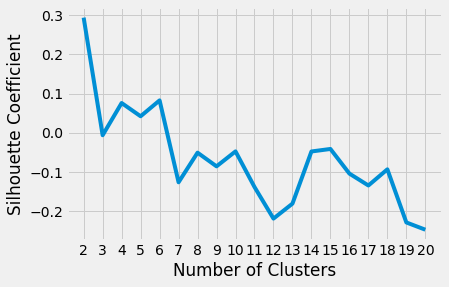

D'après l'index de Silhouette, le meilleur nombre de clusters est: 2  avec un score de :  0.2938627163070187


In [60]:
from sklearn.decomposition import NMF
import sklearn.preprocessing as skpreproc

best_clusters_nmf = 0
silh_score_nmf = 0.0
silhouette_coefficients = []


# assurer que toutes les données ne sont pas négatives
X_scaled = skpreproc.minmax_scale(princ_pca)

# On commence à 2 clusters pour le coefficient de silhouette
for k in range(2, 21):
    nmf_sil = NMF(n_components=k, init='random', max_iter=600)
    D = nmf_sil.fit_transform(X_scaled)
    W = nmf_sil.components_
    NMF_labels = np.argmax(D, axis=1)
    score = silhouette_score(X_scaled, NMF_labels)
    silhouette_coefficients.append(score)
    if score > silh_score_nmf:
        silh_score_nmf = score
        best_clusters_nmf = k

plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
print('D\'après l\'index de Silhouette, le meilleur nombre de clusters est:',best_clusters_nmf,' avec un score de : ',silh_score_nmf)

In [61]:

nmf = NMF(n_components= best_clusters_nmf , init='random', random_state=0,max_iter=200)
W = nmf.fit_transform(X)
H = nmf.components_

In [62]:
W = np.around(W , decimals = 2)
print('W :\n',W)

W :
 [[4.02 0.02]
 [2.96 0.02]
 [1.46 0.04]
 ...
 [2.17 0.04]
 [4.42 0.02]
 [2.74 0.  ]]


In [63]:
H = np.around(H , decimals = 2)
print('H :\n',H)

H :
 [[1.4230e+01 7.0000e-02 3.0000e-02 1.0000e-02 0.0000e+00 1.0000e-02
  0.0000e+00 0.0000e+00 1.0000e-02 2.0000e-02 2.0000e-02 0.0000e+00
  1.0000e-02 1.0000e-02 2.0000e-02]
 [1.1647e+02 2.1000e+01 0.0000e+00 0.0000e+00 2.1990e+01 9.0000e-02
  3.4290e+01 1.2900e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.1700e+00
  1.5700e+00 0.0000e+00 0.0000e+00]]


In [64]:
# X = WH

X_e = np.dot(W , H)

print(f'Estimated X: \n {np.around(X_e , decimals = 2)}')

Estimated X: 
 [[5.953e+01 7.000e-01 1.200e-01 ... 7.000e-02 4.000e-02 8.000e-02]
 [4.445e+01 6.300e-01 9.000e-02 ... 6.000e-02 3.000e-02 6.000e-02]
 [2.543e+01 9.400e-01 4.000e-02 ... 8.000e-02 1.000e-02 3.000e-02]
 ...
 [3.554e+01 9.900e-01 7.000e-02 ... 8.000e-02 2.000e-02 4.000e-02]
 [6.523e+01 7.300e-01 1.300e-01 ... 8.000e-02 4.000e-02 9.000e-02]
 [3.899e+01 1.900e-01 8.000e-02 ... 3.000e-02 3.000e-02 5.000e-02]]


# CAH

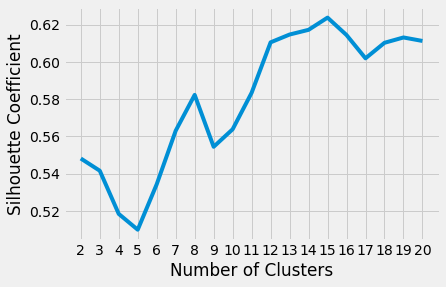

D'après l'index de Silhouette, le meilleur nombre de clusters est: 15
avec un score de :  0.623811580528721


In [65]:
from sklearn.cluster import AgglomerativeClustering

best_clusters_cah = 0
silh_score_cah = 0.0
silhouette_coefficients = []


# assurer que toutes les données ne sont pas négatives
# X_scaled = skpreproc.minmax_scale(princ_pca)

# On commence à 2 clusters pour le coefficient de silhouette
for k in range(2, 21):
    cah_sil = AgglomerativeClustering(n_clusters=k)
    cah_sil = cah_sil.fit(princ_pca)    #fit(princ_pca.todense())
    cah_labels = cah_sil.labels_
    score = silhouette_score(princ_pca, cah_labels)
    silhouette_coefficients.append(score)
    if score > silh_score_cah:
        silh_score_cah = score
        best_clusters_cah = k

plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
print('D\'après l\'index de Silhouette, le meilleur nombre de clusters est:',best_clusters_cah)
print('avec un score de : ',silh_score_cah)

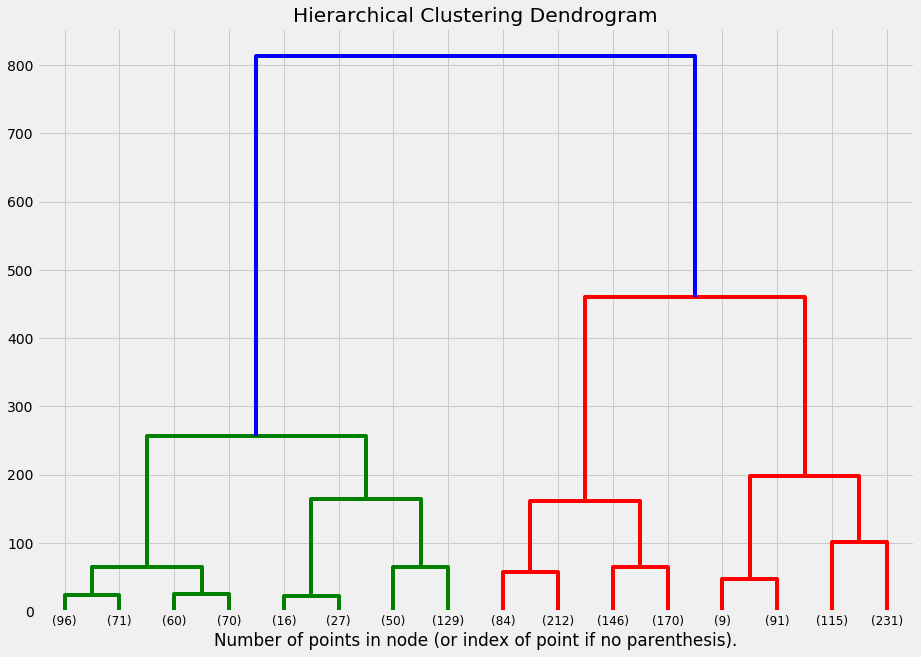

In [66]:
from scipy.cluster.hierarchy import dendrogram



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model_cah = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model_cah = model_cah.fit(princ_pca)
plt.figure(figsize=(14, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model_cah, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 6. Visualisez les résultats à l'aide de scatter pour analyser visuellement la structure de clustering des trois méthodes.

# Kmeans

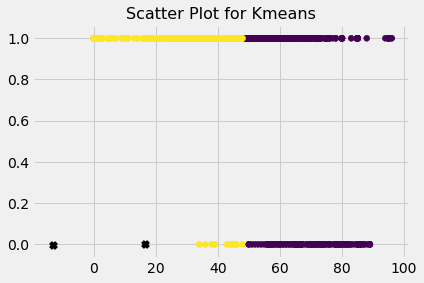

In [67]:
kmeans_sc = KMeans(n_clusters= 2 , random_state=0).fit(princ_pca)
y_kmeans = kmeans_sc.predict(princ_pca)

labels_sc = kmeans_sc.labels_

centroids = kmeans_sc.cluster_centers_

plt.title('Scatter Plot for Kmeans', fontsize = 16)
plt.scatter(df['age'], Y, c=labels_sc)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

# NMF

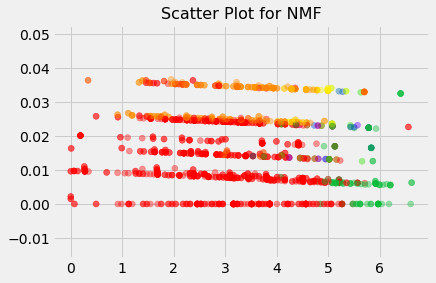

In [68]:
train_X_nmf = nmf.transform(X)
test_X_nmf = nmf.transform(X)

plt.title('Scatter Plot for NMF', fontsize = 16)
plt.scatter(train_X_nmf[:,0], train_X_nmf[:,1], c=NMF_labels,  cmap='prism', alpha=0.4)

### CAH

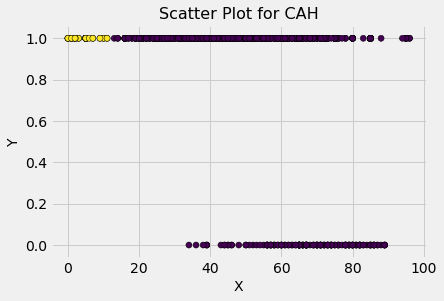

In [69]:
# Scatter plot with average linkage
plt.title('Scatter Plot for CAH', fontsize = 16)
model_cah2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model_cah2 = model_cah2.fit(X)
plt.scatter(X['age'], Y, c=model_cah2.labels_, marker='o', edgecolors='black')
plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.show() 

## 7. Les données sont déséquilibrées. Vous pouvez les équilibrer en réduisant aléatoirement la classe majoritaire. Supposons que vous extrayez aléatoirement des échantillons équilibrés. Comment les résultats de la prédiction changeront-ils?

In [70]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Afficher la distribution des classes
print(Counter(Y))

# définir la méthode 'undersample'
undersample = RandomUnderSampler(sampling_strategy='majority')

# ajuster et appliquer la transformation
X_over, y_over = undersample.fit_resample(X, Y)

# la distribution des classes après la transformation
print(Counter(y_over))

Counter({1: 1439, 0: 138})
Counter({0: 138, 1: 138})


Si la grande majorité des observations appartient à la même catégorie, on risque d'avoir un modèle peu intelligent qui va toujours prédire la classe dominante.

## 8. Comment pouvez-vous mieux gérer ce déséquilibre entre les classes ?

Une technique consiste tout simplement à rééquilibrer le jeu de données. Soit en faisant de l’undersampling, en enlevant des données de la classe majoritaire, soit en faisant de l’oversampling, en rajoutant des nouvelles données dans la classe minoritaire.
Aussi il vaut mieux d'utiliser des métriques plus adaptées, comme : La précision , Le rappel , Le F1-Score et La matrice de confusion afin d'avoir un modèle performant.

## 9. Pour trouver les meilleurs paramètres pour les modèles, l'algorithme Greedy Search peut être utilisé, disponible dans la bibliothèque scikit-learn. Expliquez l'algorithme et utilisez-le pour les modèles d'apprentissage choisis afin de trouver les meilleurs paramètres

l'algorithme Greedy Search automatise la recherche d’un optimum parmi les hyperparamètre afin de trouver les meilleurs paramètres pour les modèles,
L'algorithme Greedy Search fait toujours le choix qui semble être le meilleur à ce moment-là. Cela signifie qu'il fait un choix localement optimal dans l'espoir que ce choix conduira à une solution globalement optimale.
Supposons qu'on a une fonction objective qui doit être optimisée (maximisée ou minimisée) à un moment donné. L'algorithme Greedy fait des choix gourmands à chaque étape pour s'assurer que la fonction objectif est optimisée. L'algorithme Greedy n'a qu'un seul coup pour calculer la solution optimale afin qu'il ne revienne jamais en arrière et annule la décision.


#### Cas de KNN

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': list(range(1,30))}
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n

[CV] n_neighbors=24 ..................................................
[CV] ................................... n_neighbors=24, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ................................... n_neighbors=24, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ................................... n_neighbors=24, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ................................... n_neighbors=24, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ................................... n_neighbors=25, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ................................... n_neighbors=25, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ................................... n_neighbors=25, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   11.1s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True, verbose=2)

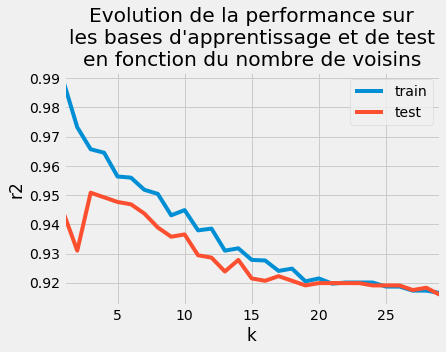

In [72]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']


df_score = pd.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = df_score.plot(x='k', y='train', figsize=(6, 4))
df_score.plot(x='k', y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("r2");

Après 6 voisins, la pertinence du modèle décroît fortement, ce qui paraît normal car plus il y a de voisins, moins la prédiction est locale en quelque sorte.

In [92]:
print ('Les meilleurs paramètres sont :',grid.best_estimator_)
best_n_neighbors = grid.best_params_['n_neighbors']

Les meilleurs paramètres sont : KNeighborsClassifier(n_neighbors=3)


#### Cas d'arbre de decision


In [79]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(clf, params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.3s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [80]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9651898734177216

In [101]:
best_max_leaf_nodes    = grid_search_cv.best_params_['max_leaf_nodes']
best_min_samples_split = grid_search_cv.best_params_['min_samples_split']
print ('Les meilleurs paramètres sont :',grid_search_cv.best_estimator_)

Les meilleurs paramètres sont : DecisionTreeClassifier(max_leaf_nodes=12, min_samples_split=3)


#### Cas de classificateur Bayes


In [82]:
parameters = {'alpha':[0.01, 0.05 ,0.1, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60] }

clf_CB_GS = GridSearchCV(clf_CB, parameters, scoring='f1')
clf_CB_GS.fit(X_train, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 1, 5, 10, 15, 20, 25, 30,
                                   35, 40, 45, 50, 60]},
             scoring='f1')

In [83]:
clf_CB_GS.score(X_test, y_test)

0.9879101899827288

In [108]:
print ('Les meilleurs paramètres sont :',clf_CB_GS.best_estimator_)
best_alpha = clf_CB_GS.best_params_['alpha']

Les meilleurs paramètres sont : MultinomialNB(alpha=0.05)


## 10. Présentez et expliquez le formalisme algorithmique et mathématique de la méthode qui donne les meilleurs résultats. Expliquez tous les paramètres de la méthode utilisée et leur impact sur les résultats.

Nous choisirons les paramètres trouvés par l'algorithme Greedy Search, afin de comparer les résultats des trois méthodes

### KNN

In [95]:
best_n_neighbors

3

In [96]:
# K Nearest Neighbors
knn2 = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train,y_train)
y_pred_KNN = knn2.predict(X_test)


In [97]:
knn_Accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuray score: \t\t", knn_Accuracy)

knn_F1_Score = f1_score(y_test, y_pred_KNN,average='macro')
print("F-Measure: \t\t", knn_F1_Score)

knn_Precision = precision_score(y_test, y_pred_KNN, average='macro')
print("Precision score: \t", knn_Precision)

knn_Recall = recall_score(y_test, y_pred_KNN, average='macro')
print("Recall score: \t\t", knn_Recall)

Accuray score: 		 0.9588607594936709
F-Measure: 		 0.866132238407143
Precision score: 	 0.9177177622792699
Recall score: 		 0.828088578088578


In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

knn_pred_test_prob = knn2.predict_proba(X_test)[:, 1] 

#True Positive Rate and False Positive Rate.
fpr, tpr, threshold = roc_curve(y_test, knn_pred_test_prob)

knn_auc = roc_auc_score(y_test, knn_pred_test_prob)
print("The AUC score: \t\t", knn_auc)

The AUC score: 		 0.8405011655011655


In [99]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()


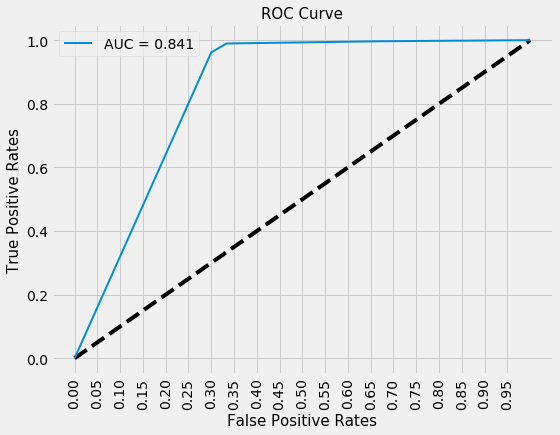

In [100]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % knn_auc)

## Arbre de decision

In [102]:
best_max_leaf_nodes

12

In [103]:
best_min_samples_split

3

In [104]:

clf_ad = tree.DecisionTreeClassifier(max_leaf_nodes= best_max_leaf_nodes , min_samples_split= best_min_samples_split)
clf_ad.fit(X_train,y_train)

y_pred_ad = clf_ad.predict(X_test)

In [105]:
ad_Accuracy = accuracy_score(y_test, y_pred_ad)
print("Accuray score: \t\t", ad_Accuracy)

ad_F1_Score = f1_score(y_test, y_pred_ad,average='macro')
print("F-Measure: \t\t", ad_F1_Score)

ad_Precision = precision_score(y_test, y_pred_ad, average='macro')
print("Precision score: \t", ad_Precision)

ad_Recall = recall_score(y_test, y_pred_ad, average='macro')
print("Recall score: \t\t", ad_Recall)

Accuray score: 		 0.9651898734177216
F-Measure: 		 0.886727278652198
Precision score: 	 0.9411633773556907
Recall score: 		 0.8465034965034965


In [106]:
ad_pred_test_prob = clf_ad.predict_proba(X_test)[:, 1] 

#True Positive Rate and False Positive Rate.
fpr, tpr, threshold = roc_curve(y_test, ad_pred_test_prob)

ad_auc = roc_auc_score(y_test, ad_pred_test_prob)
print("The AUC score: \t\t", ad_auc)

The AUC score: 		 0.8123543123543124


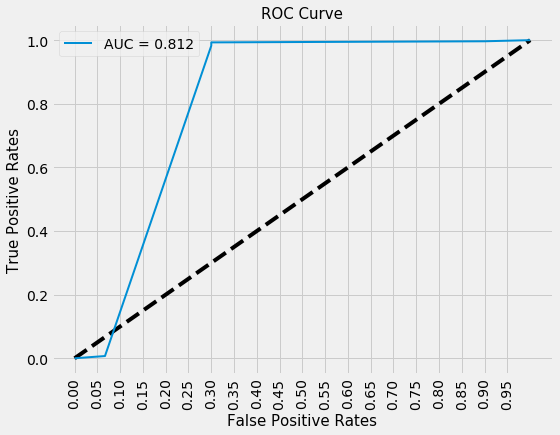

In [107]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % ad_auc)

## Classificateur Bayes

In [109]:
best_alpha

0.05

In [110]:
clf_nb = MultinomialNB(alpha=best_alpha)
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

In [111]:
nb_Accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuray score: \t\t", nb_Accuracy)

nb_F1_Score = f1_score(y_test, y_pred_nb,average='macro')
print("F-Measure: \t\t", nb_F1_Score)

nb_Precision = precision_score(y_test, y_pred_nb, average='macro')
print("Precision score: \t", nb_Precision)

nb_Recall = recall_score(y_test, y_pred_nb, average='macro')
print("Recall score: \t\t", nb_Recall)

Accuray score: 		 0.9778481012658228
F-Measure: 		 0.9279173591423079
Precision score: 	 0.9880546075085324
Recall score: 		 0.8833333333333333


In [112]:
nb_pred_test_prob = clf_nb.predict_proba(X_test)[:, 1] 

#True Positive Rate and False Positive Rate.
fpr, tpr, threshold = roc_curve(y_test, nb_pred_test_prob)

nb_auc = roc_auc_score(y_test, nb_pred_test_prob)
print("The AUC score: \t\t", nb_auc)

The AUC score: 		 0.896969696969697


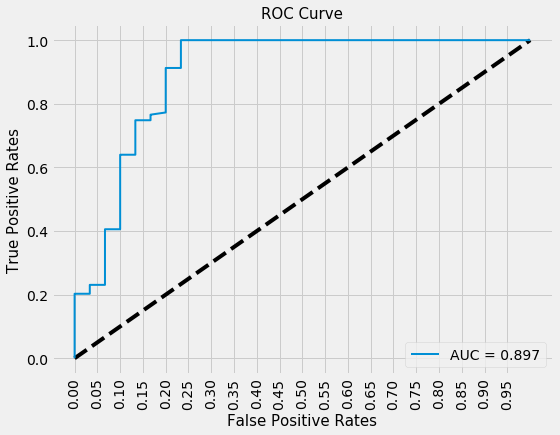

In [113]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % nb_auc)

In [114]:
results = pd.DataFrame(
    {
        'Accuracy'     : [ knn_Accuracy  , ad_Accuracy  , nb_Accuracy  ],
        'Precision'    : [ knn_Precision , ad_Precision , nb_Precision ],
        'F1_Score'     : [ knn_F1_Score  , ad_F1_Score  , nb_F1_Score  ],
        'Recall'       : [ knn_Recall    , ad_Recall    , nb_Recall    ],
        'AUC'          : [ knn_auc       , ad_auc       , nb_auc       ]
    }, index=[ 'K-Nearest Neighbors' , 'Arbre de decision' , 'Classificateur Bayes' ])
results

,Accuracy,Precision,F1_Score,Recall,AUC
K-Nearest Neighbors,0.958861,0.917718,0.866132,0.828089,0.840501
Arbre de decision,0.965190,0.941163,0.886727,0.846503,0.812354
Classificateur Bayes,0.977848,0.988055,0.927917,0.883333,0.896970


### A partir de ce tableau trouvé, nous pouvons remarquer que le Classificateur Bayes donne les meilleurs résultats.

***
### Réalisé par : AABBOU ZAKARIA
- [E-mail :](mailto:zakaria.abbou199434@gmail.com) zakaria.abbou199434@gmail.com
- [GitHub :](https://github.com/ZakariaAABBOU) github.com/ZakariaAABBOU
- [Linkedin :](https://www.linkedin.com/in/zakaria-aabbou/) linkedin.com/in/zakaria-aabbou/